Total steps: 2016, Final position: (10, 23), Final number: 2084
Furthest point reached: 3199 at position (-28, -22)


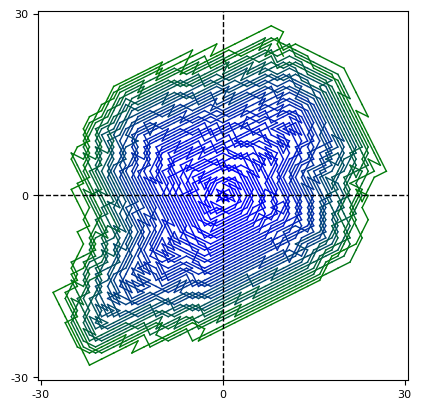

In [117]:
import math
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import itertools

def generate_square_spiral(n):
    if n < 1 or n % 1 != 0:
        return "Invalid input, generate_square_spiral only takes positive integers"
    size = n if n % 2 == 1 else n + 1
    matrix = [[0 for _ in range(size)] for _ in range(size)]
    x, y = size // 2, size // 2
    dx, dy = 1, 0
    matrix[x][y] = 1
    x += dx
    y += dy
    for num in range(size * size + 1):
        matrix[x][y] = num
        if matrix[x - dy][y + dx] == 0:
            x += -dy
            y += dx
            dx, dy = -dy, dx
        else:
            x += dx
            y += dy
    return matrix

def format_number(num, digits):
    return f"{num:>{digits}d}"

def print_matrix(matrix):
    max_digits = max(len(str(num)) for row in matrix for num in row)
    for row in matrix:
        formatted_row = [format_number(num, max_digits) for num in row]
        print(" " .join(formatted_row))

def knight_moves(knight_type):
    a, b = knight_type[0], knight_type[1]
    return [(a, b), (a, -b), (-a, b), (-a, -b), (b, a), (b, -a), (-b, a), (-b, -a)]

def knights_tour(matrix, knight_type, start_no=1):
    n = len(matrix)
    start_pos = None
    for i in range(n):
        for j in range(n):
            if matrix[i][j] == start_no:
                start_pos = (i, j)
                break
        if start_pos:
            break
    if not start_pos:
        return "Starting number not found"
    x, y = start_pos
    visited = [[False] * n for _ in range(n)]
    visited[x][y] = True
    moves = knight_moves(knight_type)
    sequence = []
    sequence.append((x, y))
    while True:
        next_move = None
        min_number = float('inf')
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and not visited[nx][ny]:
                if matrix[nx][ny] < min_number:
                    min_number = matrix[nx][ny]
                    next_move = (nx, ny)
        if not next_move:
            break
        x, y = next_move
        if matrix[x][y] == 0:
            break
        visited[x][y] = True
        sequence.append((x, y))
    return sequence

def plot_knight_path_detailed(grid, path):
    grid_array = np.array(grid)
    fig, ax = plt.subplots()
    ax.imshow(np.ones_like(grid_array), cmap='binary', vmin=0, vmax=0, interpolation='none')
    for (i, j), value in np.ndenumerate(grid_array):
        ax.text(j, i, f'{value}', ha='center', va='center', color='black', fontsize=12)
    cmap = LinearSegmentedColormap.from_list('arrow_colors', ['black', 'red'])
    norm = plt.Normalize(0, len(path) - 1)
    x_coords = [pos[1] for pos in path]
    y_coords = [pos[0] for pos in path]
    for i in range(len(path) - 1):
        color = cmap(norm(i))
        ax.annotate('', xy=(x_coords[i+1], y_coords[i+1]), xytext=(x_coords[i], y_coords[i]),
                    arrowprops=dict(arrowstyle='->', color=color, lw=2))
    final_pos = path[-1]
    ax.add_patch(plt.Rectangle((final_pos[1] - 0.5, final_pos[0] - 0.5), 1, 1, fill=True, color='blue', alpha=0.3))
    ax.set_xticks(np.arange(-0.5, len(grid_array[0]), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(grid_array), 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.tick_params(which='minor', size=0)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

def plot_knight_path_simplified(grid, path):
    grid_array = np.array(grid)
    rows, cols = grid_array.shape
    fig, ax = plt.subplots()
    x_coords = [pos[1] for pos in path]
    y_coords = [pos[0] for pos in path]
    cmap = LinearSegmentedColormap.from_list('line_colors', ['blue', 'green'])
    norm = plt.Normalize(0, len(path) - 1)
    for i in range(len(path) - 1):
        color = cmap(norm(i))
        ax.plot([x_coords[i], x_coords[i+1]], [y_coords[i], y_coords[i+1]], color=color, lw=1)
    center_x = cols // 2
    center_y = rows // 2
    ax.axhline(y=center_y, color='black', linestyle='--', linewidth=1)
    ax.axvline(x=center_x, color='black', linestyle='--', linewidth=1)
    ax.set_xticks([0, cols // 2, cols - 1])
    ax.set_xticklabels([f'{0 - cols // 2}', '0', f'{cols - 1 - cols // 2}'], fontsize=8)
    ax.xaxis.tick_bottom()
    ax.set_yticks([0, rows // 2, rows - 1])
    ax.set_yticklabels([f'{rows // 2 - 0}', '0', f'{rows // 2 - (rows - 1)}'], fontsize=8)
    ax.yaxis.tick_left()
    ax.set_xlim(-0.5, cols - 0.5)
    ax.set_ylim(rows - 0.5, -0.5)
    ax.set_aspect('equal')
    plt.show()

def distance_from_origin(x, y):
    return math.sqrt(x**2 + y**2)

def find_furthest_coordinate(coordinates):
    if not coordinates:
        return None
    furthest_coord = coordinates[0]
    max_distance = distance_from_origin(furthest_coord[0], furthest_coord[1])
    for coord in coordinates:
        x, y = coord
        current_distance = distance_from_origin(x, y)
        if current_distance > max_distance:
            max_distance = current_distance
            furthest_coord = coord
    return furthest_coord

def generate_off_diagonal_matrix(n):
    matrix = [[0 for _ in range(n)] for _ in range(n)]
    triangular_number = n * (n + 1) // 2
    counter = 1
    for d in range(n):
        for i in range(d + 1):
            if counter > triangular_number:
                break
            matrix[i][d - i] = counter
            counter += 1
        else:
            continue
        break
    return matrix
    
def square_spiral_knights_tour(n, knight_type):
    matrix = generate_square_spiral(n)
    sequence = knights_tour(matrix, knight_type)
    shifted_sequence = [(sequence[i][0] - n // 2, -sequence[i][1] + n // 2) for i in range(len(sequence))]
    if n <= 13:
        print("Spiral Grid:")
        print_matrix(matrix)
        print("\nKnight's Tour Sequence:")
        for i in range(len(sequence)):
            print(f"Step: {i}, Position:{shifted_sequence[i]}, Number: {matrix[sequence[i][0]][sequence[i][1]]}")
        plot_knight_path_detailed(matrix, sequence)
    if n > 13:
        furthest_point_coordinates = find_furthest_coordinate(shifted_sequence)
        furthest_point_position = sequence[shifted_sequence.index(furthest_point_coordinates)]
        furthest_point_value = matrix[furthest_point_position[0]][furthest_point_position[1]]
        furthest_point_coordinates2 = [1234, 5678]
        furthest_point_coordinates2[0], furthest_point_coordinates2[1] = -furthest_point_coordinates[0], -furthest_point_coordinates[1]
        print(f"Total steps: {len(sequence)}, Final position: {(-shifted_sequence[-1][1], -shifted_sequence[-1][0])}, Final number: {matrix[sequence[-1][0]][sequence[-1][1]]}\nFurthest point reached: {furthest_point_value} at position {tuple(furthest_point_coordinates2)}")
        plot_knight_path_simplified(matrix, sequence)

def off_diagonal_knights_tour(n, knight_type):
    matrix = generate_off_diagonal_matrix(n)
    sequence = knights_tour(matrix, knight_type)
    if n <= 14:
        print("Grid:")
        print_matrix(matrix)
        print("\nKnight's Tour Sequence:")
        for i in range(len(sequence)):
            print(f"Step: {i}, Position:{sequence[i]}, Number: {matrix[sequence[i][0]][sequence[i][1]]}")
        plot_knight_path_detailed(matrix, sequence)
    if n > 14:
        print(f"Total steps: {len(sequence)}, Final position: {(sequence[-1][0], sequence[-1][1])}, Final number: {matrix[sequence[-1][0]][sequence[-1][1]]}")
        plot_knight_path_simplified(matrix, sequence)

def main():
    n = 60
    matrix_type = "square"
    knight_type = (1, 2)
    if matrix_type == "square":
        square_spiral_knights_tour(n, knight_type)
    if matrix_type == "off_diagonal":
        off_diagonal_knights_tour(n, knight_type)

if __name__ == "__main__":
    main()